In [4]:
# Load your Top2Vec model
import plotly.graph_objects as go
from plotly.io import to_html
from top2vec import Top2Vec

2853 27


/home/alfredourrea/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



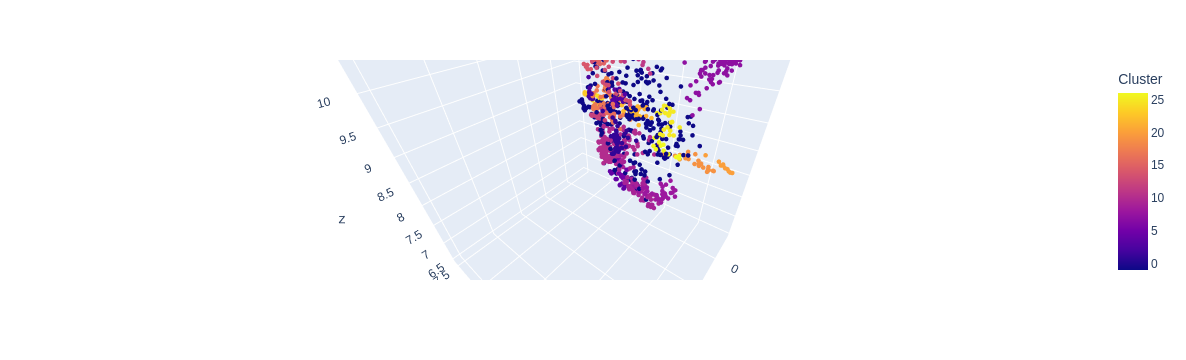

In [6]:
model = Top2Vec.load("model_EP")

print(len(model.vocab), model.get_num_topics())

# Obtain document vectors and clusters (labels)
doc_vecs = model.document_vectors
cluster_labels = model.doc_top # Or any other method to obtain labels if this doesn't directly apply

umap_args = {'n_neighbors': 15,
             'n_components': 6,
             'metric': 'cosine',
             "random_state": 42,
        }

hdbscan_args = {'min_cluster_size': 9,
                'min_samples': 2,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'
            }
# Use UMAP to reduce dimensionality for visualization (adjust parameters as necessary)
import umap
from umap import UMAP

doc_vecs = model.document_vectors

umap_3d = umap.UMAP(**umap_args)
proj_3d = umap_3d.fit_transform(doc_vecs)

import hdbscan
from hdbscan import HDBSCAN

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(proj_3d)

topic_words = model.get_topics()[0] 

top_3_topic_words = [words[:3] for words in topic_words]
doc_top_3_words = [top_3_topic_words[label] for label in cluster.labels_]

# Generate a 3D scatter plot
import pandas as pd
import plotly.express as px

x, y, z = proj_3d[:,0], proj_3d[:,1], proj_3d[:,2]
# Prepare the DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z,
    'Top 3 Topic Words': ['; '.join(words) for words in doc_top_3_words],  # Joining the top 3 words for hover info
    'Cluster': cluster.labels_
})

# Generate the 3D scatter plot
fig_3d = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='Cluster',
    hover_data=['Top 3 Topic Words']  # Include the top 3 topic words in the hover data
)

fig_3d.update_traces(marker_size=1.5)  # Adjust marker size for better visibility if needed
fig_3d.show()

Text(0.0, 1.0, 'Topic 8')

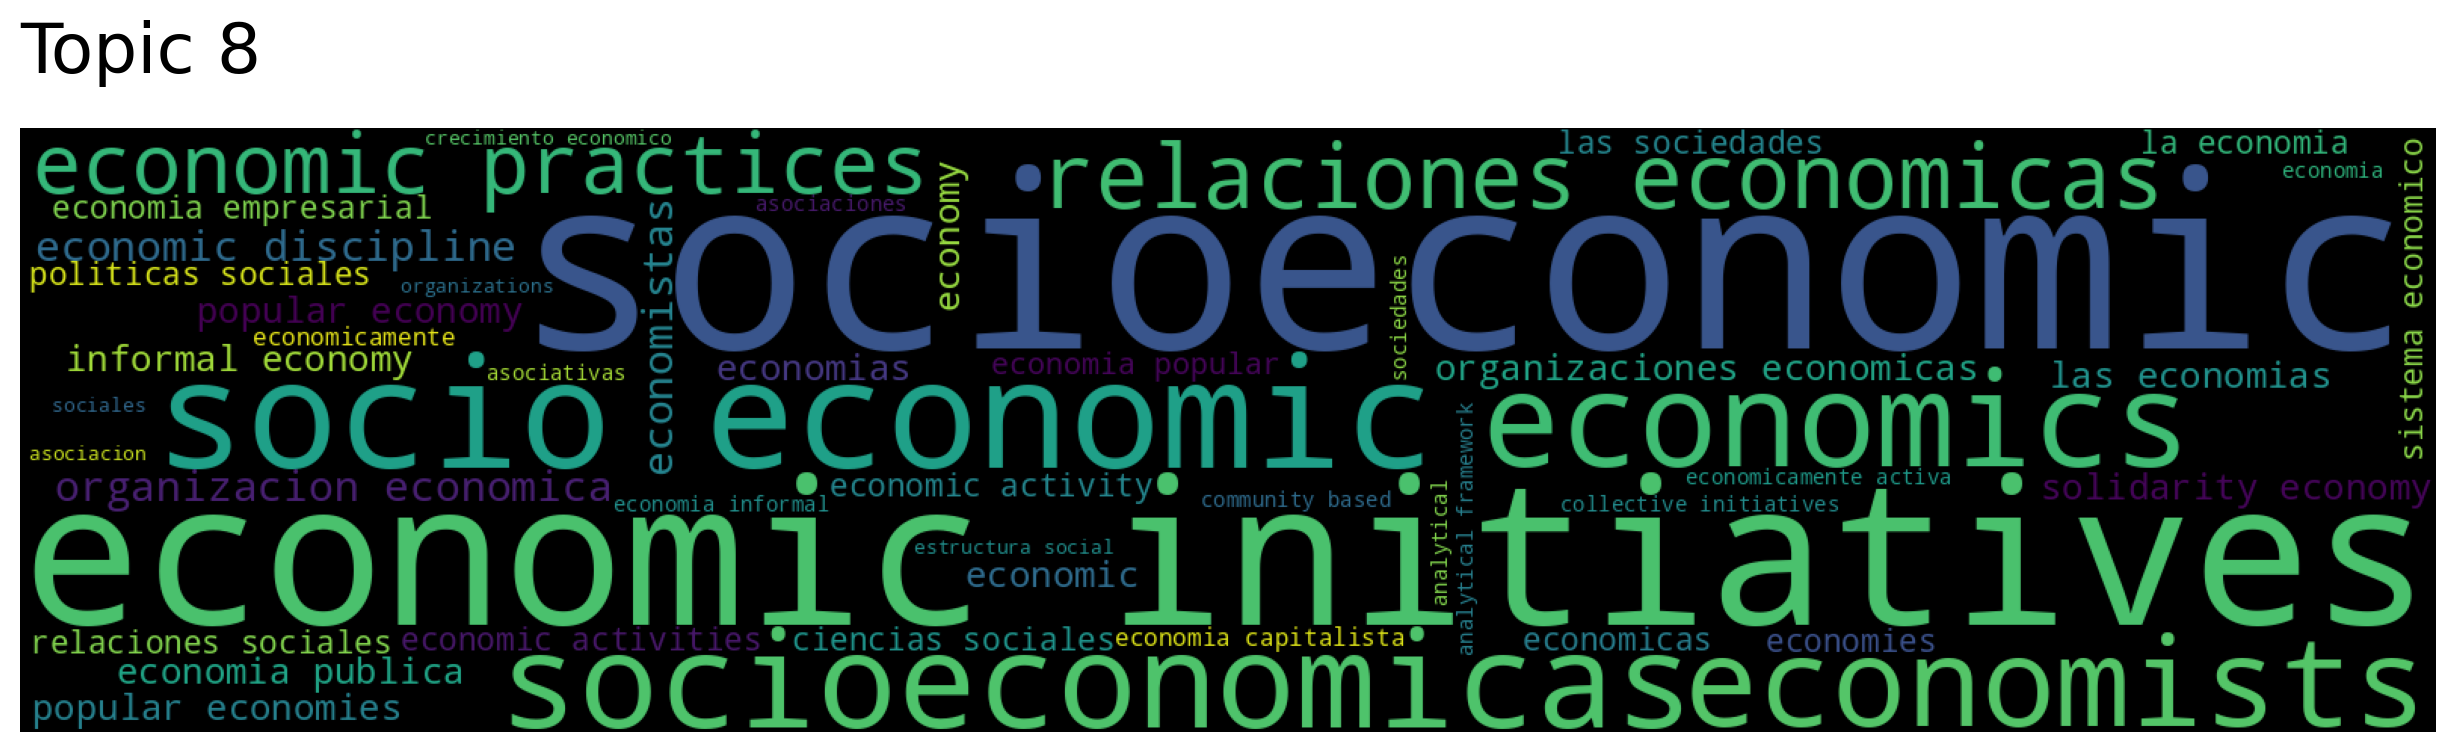

In [12]:
from scipy.special import softmax
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["unidades domesticas"], num_topics=4)

topic_num = topic_nums[1]
word_score_dict = dict(zip(model.topic_words[topic_num], softmax(model.topic_word_scores[topic_num])))

background_color = "black"

plt.figure(figsize=(16, 4), dpi=200)
plt.axis("off")
plt.imshow(
            WordCloud(width=1600,
            height=400,
            background_color=background_color).generate_from_frequencies(word_score_dict))
plt.title("Topic " + str(topic_num), loc='left', fontsize=25, pad=20)